In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
data = pd.read_csv("/Users/lenovo/OneDrive/Рабочий стол/study/DM/tracks.csv")
data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [88]:
list(data.columns)

['id',
 'name',
 'popularity',
 'duration_ms',
 'explicit',
 'artists',
 'id_artists',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [89]:
data = data.drop(columns = ['id', 'explicit', 'id_artists', 'key', 'mode', 'time_signature'])
data = data.drop_duplicates()

In [113]:
train_x = data[['duration_ms', 
     'danceability',
     'energy',
     'loudness',
     'speechiness',
     'acousticness',
     'instrumentalness',
     'liveness',
     'valence',
     'tempo']][:486672]
train_y = data['popularity'][:486672]

test_x = data[['duration_ms', 
     'danceability',
     'energy',
     'loudness',
     'speechiness',
     'acousticness',
     'instrumentalness',
     'liveness',
     'valence',
     'tempo']][486672:]
test_y = data['popularity'][486672:]

x_data = np.array(train_x)
y_data = np.array(train_y)

        duration_ms  danceability  energy  loudness  speechiness  \
487848       183693         0.375   0.364   -15.571       0.1420   
487849       134280         0.574   0.500   -16.218       0.0589   
487850       202173         0.562   0.206   -18.377       0.0405   
487851       529347         0.257   0.129   -20.715       0.0526   
487852       222154         0.767   0.671    -6.810       0.2160   
...             ...           ...     ...       ...          ...   
586667       258267         0.560   0.518    -7.471       0.0292   
586668       153293         0.765   0.663    -5.223       0.0652   
586669       187601         0.535   0.314   -12.823       0.0408   
586670       142003         0.696   0.615    -6.212       0.0345   
586671       214360         0.686   0.723    -7.067       0.0363   

        acousticness  instrumentalness  liveness  valence    tempo  
487848         0.882          0.944000    0.8000   0.3810   78.156  
487849         0.846          0.904000    0.7

In [91]:
model = LinearRegression().fit(x_data, y_data)

In [92]:
print(model.coef_)

[ 1.51671375e-06  1.70042648e+01  2.32606684e+00  4.90945899e-01
 -4.80216978e+00 -1.29948623e+01 -1.01294476e+01 -3.72658654e+00
 -1.33694699e+01  7.06567473e-03]


In [93]:
criteria = ['duration_ms', 
     'danceability',
     'energy',
     'loudness',
     'speechiness',
     'acousticness',
     'instrumentalness',
     'liveness',
     'valence',
     'tempo']
dependence = model.coef_
df = pd.DataFrame({'Criteria': criteria, 'Coefficent': dependence})
df

,Criteria,Coefficent
0,duration_ms,0.000002
1,danceability,17.004265
2,energy,2.326067
3,loudness,0.490946
4,speechiness,-4.802170
5,acousticness,-12.994862
6,instrumentalness,-10.129448
7,liveness,-3.726587
8,valence,-13.369470
9,tempo,0.007066


In [94]:
y_predicted = model.predict(test_x)
compare = pd.DataFrame({'Actual': test_y, 'Predicted': y_predicted})

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
compare

Mean Absolute Error: 11.382961235349084


,Actual,Predicted
487848,3,7.403065
487849,4,8.508252
487850,3,9.357426
487851,4,7.263159
487852,42,35.652098
...,...,...
586667,50,31.753528
586668,72,38.389126
586669,70,28.576123
586670,58,38.006232


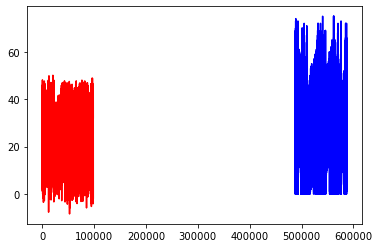

In [83]:
plt.plot(test_y, color = 'b')
plt.plot(y_predicted, color = 'r')

plt.show()

In [99]:
new_data = data.sort_values(by='popularity', ascending = False)[:49]
criteria

['duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [125]:
mean = np.array([new_data['duration_ms'].mode().mean(), 
        new_data['danceability'].mode().mean(),
        new_data['energy'].mode().mean(),
        new_data['loudness'].mode().mean(),
        new_data['speechiness'].mode().mean(),
        new_data['acousticness'].mode().mean(),
        new_data['instrumentalness'].mode().mean(),
        new_data['liveness'].mode().mean(),
        new_data['valence'].mode().mean(),
        new_data['tempo'].mode().mean()])

In [126]:
avg = pd.DataFrame({'Criteria': criteria, 'Optimal': mean})
avg

,Criteria,Optimal
0,duration_ms,205090.000000
1,danceability,0.699400
2,energy,0.614000
3,loudness,-10.059000
4,speechiness,0.054400
5,acousticness,0.261500
6,instrumentalness,0.000000
7,liveness,0.113000
8,valence,0.456667
9,tempo,109.928000


In [127]:
model.predict(mean.reshape(1,-1))

array([36.05852523])